# **Notebook: Data Scientist EDA, Processing, and Experimentation**

### 🚀 **Setup**

1. [Import Dependencies](#1-import-dependencies)

#### 📥 **Data Loading & Basic Cleaning**

2. [Load Dataset](#2-load-dataset)
3. [Inspect Columns](#3-inspect-columns)
4. [Drop Unnecessary Columns](#4-drop-unnecessary-columns)
5. [Dataset Dimensions](#5-dataset-dimensions)
6. [Check for Missing Values](#6-check-for-missing-values)
7. [Detect and Remove Duplicates](#7-detect-and-remove-duplicates)
8. [Summary](#8-summary)

#### 🔎 **Exploratory Data Analysis (EDA)**

9. [Column Overview & Target Balance](#9-column-overview--target-balance)
10. [Define Categorical & Numerical Columns](#10-define-categorical--numerical-columns)
11. [Create Working Copy](#11-create-working-copy)
12. [Numeric Distributions & Boxplots](#12-numeric-distributions--boxplots)
13. [Categorical Distributions](#13-categorical-distributions)
14. [Bivariate: Numeric vs Target](#14-bivariate-numeric-vs-target)
15. [Average Price by Arrival Month](#15-average-price-by-arrival-month)
16. [Bivariate: Categorical vs Target](#16-bivariate-categorical-vs-target)

#### 🧰 **Preprocessing & Feature Checks**

17. [Peek & Info Before Processing](#17-peek--info-before-processing)
18. [Label Encoding & Mappings](#18-label-encoding--mappings)
19. [Info After Encoding](#19-info-after-encoding)
20. [VIF (Collinearity Check)](#20-vif-collinearity-check)

#### 🔥 **Feature Correlation & Transformation**

21. [Correlation Matrix (values)](#21-correlation-matrix-values)
22. [Correlation Heatmap](#22-correlation-heatmap)
23. [Skewness & Log1p Transform](#23-skewness--log1p-transform)
24. [Target Balance (Post-Transform)](#24-target-balance-post-transform)

#### ⚖️ **Class Balancing & Train/Test Prep**

25. [Split Features/Target](#25-split-featurestarget)
26. [Inspect Feature Columns & Target](#26-inspect-feature-columns--target)
27. [Handle Class Imbalance with SMOTE](#27-handle-class-imbalance-with-smote)
28. [Build Balanced DataFrame](#28-build-balanced-dataframe)
29. [Replace df with Balanced Copy](#29-replace-df-with-balanced-copy)

#### 🧠 **Baseline Modelling & Feature Importance**

30. [Column Count](#30-column-count)
31. [Feature Importance via RandomForest](#31-feature-importance-via-randomforest)
32. [Top-10 Feature Subset](#32-top10-feature-subset)
33. [Train/Test Split](#33-traintest-split)
34. [Model Zoo: Train & Evaluate](#34-model-zoo-train--evaluate)
35. [Metrics Leaderboard](#35-metrics-leaderboard)

#### 🎛️ **Tuning & Evaluation**

36. [RandomForest Hyperparameter Tuning (RandomizedSearchCV)](#36-randomforest-hyperparameter-tuning-randomizedsearchcv)
37. [Best Model & Evaluation Metrics](#37-best-model--evaluation-metrics)
38. [Summary: Model Performance](#38-summary-model-performance)

#### 💾 **Persistence & Inference**

39. [Save Best Model (Joblib)](#39-save-best-model-joblib)
40. [Load Model Back into Memory](#40-load-model-back-into-memory)
41. [Generate Test Prediction](#41-generate-test-prediction)
42. [Final Output Summary](#42-final-output-summary)

## 🚀 **Setup**

### 🧩 **1. Import Dependencies <a id="1-import-dependencies"></a>**

In [1]:
# -------------------------------------------------------------------
# Standard Library Imports
# -------------------------------------------------------------------
import os
import math
import warnings

# -------------------------------------------------------------------
# Core Data Analysis & Manipulation
# -------------------------------------------------------------------
import pandas as pd
import numpy as np

# -------------------------------------------------------------------
# Visualisation
# -------------------------------------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns

# -------------------------------------------------------------------
# Statistical Analysis
# -------------------------------------------------------------------
from scipy.stats import randint
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# -------------------------------------------------------------------
# Preprocessing
# -------------------------------------------------------------------
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE

# -------------------------------------------------------------------
# Model Selection & Evaluation
# -------------------------------------------------------------------
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# -------------------------------------------------------------------
# Machine Learning Models
# -------------------------------------------------------------------
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

# -------------------------------------------------------------------
# Model Persistence
# -------------------------------------------------------------------
import joblib

# -------------------------------------------------------------------
# Configuration
# -------------------------------------------------------------------
warnings.simplefilter("ignore")
sns.set(style="whitegrid", palette="Set2")

print("✅ Libraries successfully imported.")

✅ Libraries successfully imported.


## 📥**Data Loading & Basic Cleaning**

### 📥 **2. Load Dataset <a id="2-load-dataset"></a>**

In [2]:
# -------------------------------------------------------------------
# Load the Training Dataset
# -------------------------------------------------------------------
# Compute relative path (works even if notebook is moved)
DATA_PATH = os.path.join("..", "artifacts", "raw", "train.csv")

try:
    df = pd.read_csv(DATA_PATH)
    print("✅ Dataset loaded successfully!")
    print(f"📂 File path: {DATA_PATH}")
    print(f"📊 Shape: {df.shape[0]:,} rows × {df.shape[1]} columns")
except FileNotFoundError:
    raise FileNotFoundError(f"❌ Could not find file at: {DATA_PATH}")

# Display first few rows
df.head()

✅ Dataset loaded successfully!
📂 File path: ..\artifacts\raw\train.csv
📊 Shape: 29,020 rows × 19 columns


,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN25630,2,1,2,1,Meal Plan 1,0,Room_Type 1,26,2017,10,17,Online,0,0,0,161.00,0,Not_Canceled
1,INN14474,2,1,1,1,Meal Plan 1,0,Room_Type 1,98,2018,7,16,Online,0,0,0,121.50,2,Not_Canceled
2,INN23721,2,0,0,3,Meal Plan 1,0,Room_Type 1,433,2018,9,8,Offline,0,0,0,70.00,0,Canceled
3,INN05844,2,0,2,5,Meal Plan 1,0,Room_Type 1,195,2018,8,8,Offline,0,0,0,72.25,0,Not_Canceled
4,INN18710,1,0,0,2,Meal Plan 1,0,Room_Type 1,188,2018,6,15,Offline,0,0,0,130.00,0,Canceled


### 🔍 **3. Inspect Columns <a id="3-inspect-columns"></a>**

In [3]:
# -------------------------------------------------------------------
# View Column Names
# -------------------------------------------------------------------
print("📋 Column names in the dataset:")
for col in df.columns:
    print(f" - {col}")

📋 Column names in the dataset:
 - Booking_ID
 - no_of_adults
 - no_of_children
 - no_of_weekend_nights
 - no_of_week_nights
 - type_of_meal_plan
 - required_car_parking_space
 - room_type_reserved
 - lead_time
 - arrival_year
 - arrival_month
 - arrival_date
 - market_segment_type
 - repeated_guest
 - no_of_previous_cancellations
 - no_of_previous_bookings_not_canceled
 - avg_price_per_room
 - no_of_special_requests
 - booking_status


### 🧹 **4. Drop Unnecessary Columns <a id="4-drop-unnecessary-columns"></a>**

In [4]:
# -------------------------------------------------------------------
# Drop Identifier Columns
# -------------------------------------------------------------------
cols_to_drop = ['Unnamed: 0', 'Booking_ID']

df.drop(columns=cols_to_drop, inplace=True, errors='ignore')

print(f"🧽 Dropped unnecessary columns: {cols_to_drop}")
print(f"📊 Updated shape: {df.shape}")
df.head()


🧽 Dropped unnecessary columns: ['Unnamed: 0', 'Booking_ID']
📊 Updated shape: (29020, 18)


,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,1,2,1,Meal Plan 1,0,Room_Type 1,26,2017,10,17,Online,0,0,0,161.00,0,Not_Canceled
1,2,1,1,1,Meal Plan 1,0,Room_Type 1,98,2018,7,16,Online,0,0,0,121.50,2,Not_Canceled
2,2,0,0,3,Meal Plan 1,0,Room_Type 1,433,2018,9,8,Offline,0,0,0,70.00,0,Canceled
3,2,0,2,5,Meal Plan 1,0,Room_Type 1,195,2018,8,8,Offline,0,0,0,72.25,0,Not_Canceled
4,1,0,0,2,Meal Plan 1,0,Room_Type 1,188,2018,6,15,Offline,0,0,0,130.00,0,Canceled


### 📏 **5. Dataset Dimensions <a id="5-dataset-dimensions"></a>**

In [5]:
# -------------------------------------------------------------------
# Display Dataset Dimensions
# -------------------------------------------------------------------
print(f"✅ The dataset now contains {df.shape[0]} rows and {df.shape[1]} columns.")

✅ The dataset now contains 29020 rows and 18 columns.


### 🔎 **6. Check for Missing Values <a id="6-check-for-missing-values"></a>**

In [6]:
# -------------------------------------------------------------------
# Identify Missing Values
# -------------------------------------------------------------------
missing_values = df.isnull().sum()

if missing_values.sum() == 0:
    print("✅ No missing values detected.")
else:
    print("⚠️ Missing values found:")
    display(missing_values[missing_values > 0])

✅ No missing values detected.


### 🧬 **7. Detect and Remove Duplicates <a id="7-detect-and-remove-duplicates"></a>**

In [7]:
# -------------------------------------------------------------------
# Identify Missing Values
# -------------------------------------------------------------------
missing_values = df.isnull().sum()

if missing_values.sum() == 0:
    print("✅ No missing values detected.")
else:
    print("⚠️ Missing values found:")
    display(missing_values[missing_values > 0])

✅ No missing values detected.


### 🧾 **8. Summary <a id="8-summary"></a>**

In [8]:
# -------------------------------------------------------------------
# Detect and Remove Duplicate Records
# -------------------------------------------------------------------
duplicate_count = df.duplicated().sum()
print(f"🔍 Duplicate records found: {duplicate_count}")

if duplicate_count > 0:
    df.drop_duplicates(inplace=True)
    print("🧹 Duplicates removed.")
    print(f"✅ Updated shape: {df.shape}")
else:
    print("✅ No duplicates to remove.")

🔍 Duplicate records found: 7661
🧹 Duplicates removed.
✅ Updated shape: (21359, 18)


## 🔎 **Exploratory Data Analysis (EDA)**

### 🔎 **9. Column Overview & Target Balance <a id="9-column-overview--target-balance"></a>**

In [9]:
# -------------------------------------------------------------------
# Column Overview & Target Balance
# -------------------------------------------------------------------
print("📋 Columns:")
for c in df.columns:
    print(f" - {c}")

print("\n🎯 Target balance — booking_status:")
try:
    display(df["booking_status"].value_counts().to_frame("count"))
except KeyError:
    raise KeyError("❌ 'booking_status' column not found. Check your dataset.")

📋 Columns:
 - no_of_adults
 - no_of_children
 - no_of_weekend_nights
 - no_of_week_nights
 - type_of_meal_plan
 - required_car_parking_space
 - room_type_reserved
 - lead_time
 - arrival_year
 - arrival_month
 - arrival_date
 - market_segment_type
 - repeated_guest
 - no_of_previous_cancellations
 - no_of_previous_bookings_not_canceled
 - avg_price_per_room
 - no_of_special_requests
 - booking_status

🎯 Target balance — booking_status:


,count
booking_status,
Not_Canceled,15231
Canceled,6128


### 🧭 **10. Define Categorical & Numerical Columns <a id="10-define-categorical--numerical-columns"></a>**

In [10]:
# -------------------------------------------------------------------
# Define Feature Groups
# -------------------------------------------------------------------
cat_cols = [
    'type_of_meal_plan','required_car_parking_space',
    'room_type_reserved','market_segment_type', 'repeated_guest','booking_status'
]

num_cols = [
    'no_of_adults','no_of_children','no_of_weekend_nights',
    'no_of_week_nights','lead_time','arrival_year','arrival_month',
    'arrival_date','no_of_previous_cancellations','no_of_previous_bookings_not_canceled',
    'avg_price_per_room','no_of_special_requests'
]

print(f"🧩 Categorical columns ({len(cat_cols)}): {cat_cols}")
print(f"📐 Numerical columns ({len(num_cols)}): {num_cols}")

🧩 Categorical columns (6): ['type_of_meal_plan', 'required_car_parking_space', 'room_type_reserved', 'market_segment_type', 'repeated_guest', 'booking_status']
📐 Numerical columns (12): ['no_of_adults', 'no_of_children', 'no_of_weekend_nights', 'no_of_week_nights', 'lead_time', 'arrival_year', 'arrival_month', 'arrival_date', 'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled', 'avg_price_per_room', 'no_of_special_requests']


### 🗂️ **11. Create Working Copy <a id="11-create-working-copy"></a>**

In [11]:
# -------------------------------------------------------------------
# Create a Working Copy for EDA
# -------------------------------------------------------------------
data = df.copy()
print("✅ Working copy 'data' created.")
display(data.head())

✅ Working copy 'data' created.


,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,1,2,1,Meal Plan 1,0,Room_Type 1,26,2017,10,17,Online,0,0,0,161.00,0,Not_Canceled
1,2,1,1,1,Meal Plan 1,0,Room_Type 1,98,2018,7,16,Online,0,0,0,121.50,2,Not_Canceled
2,2,0,0,3,Meal Plan 1,0,Room_Type 1,433,2018,9,8,Offline,0,0,0,70.00,0,Canceled
3,2,0,2,5,Meal Plan 1,0,Room_Type 1,195,2018,8,8,Offline,0,0,0,72.25,0,Not_Canceled
4,1,0,0,2,Meal Plan 1,0,Room_Type 1,188,2018,6,15,Offline,0,0,0,130.00,0,Canceled


### 📈 **12. Numeric Distributions & Boxplots <a id="12-numeric-distributions--boxplots"></a>**

📊 Rendering numeric distributions and boxplots…


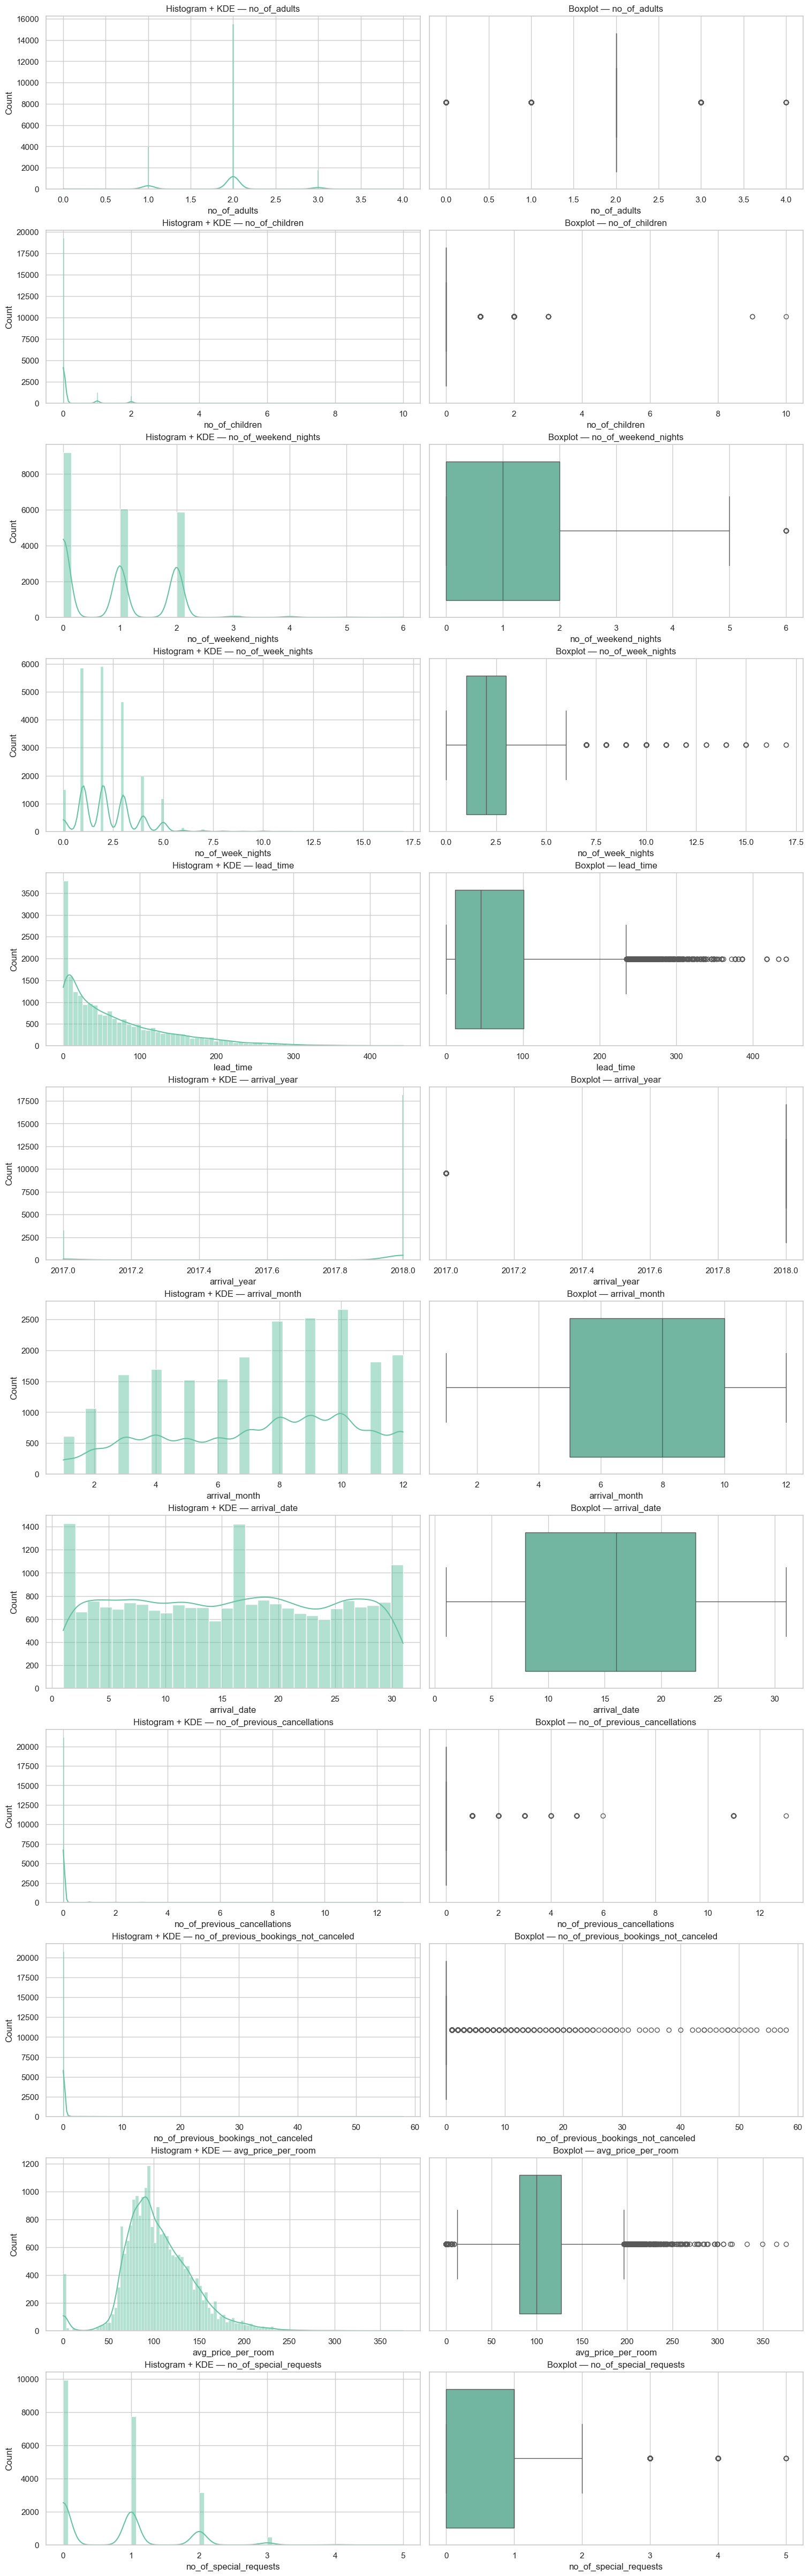

In [12]:
# -------------------------------------------------------------------
# Numeric Distributions (Histogram + KDE) and Boxplots
# -------------------------------------------------------------------
def num_plot_dist(df, num_features):
    """
    Plot histogram+KDE and boxplot for each numeric feature.
    """
    n = len(num_features)
    if n == 0:
        print("ℹ️ No numeric features provided.")
        return

    fig, axes = plt.subplots(n, 2, figsize=(15, n * 4), constrained_layout=True)
    if n == 1:
        axes = np.array([axes])  # make indexable

    for i, column in enumerate(num_features):
        # Hist + KDE
        sns.histplot(data=df, x=column, ax=axes[i, 0], kde=True, color=None)
        axes[i, 0].set_title(f"Histogram + KDE — {column}")
        axes[i, 0].set_xlabel(column)

        # Boxplot
        sns.boxplot(data=df, x=column, ax=axes[i, 1], color=None)
        axes[i, 1].set_title(f"Boxplot — {column}")
        axes[i, 1].set_xlabel(column)

    plt.show()

print("📊 Rendering numeric distributions and boxplots…")
num_plot_dist(data, num_cols)

### 🧮 **13. Categorical Distributions <a id="13-categorical-distributions"></a>**

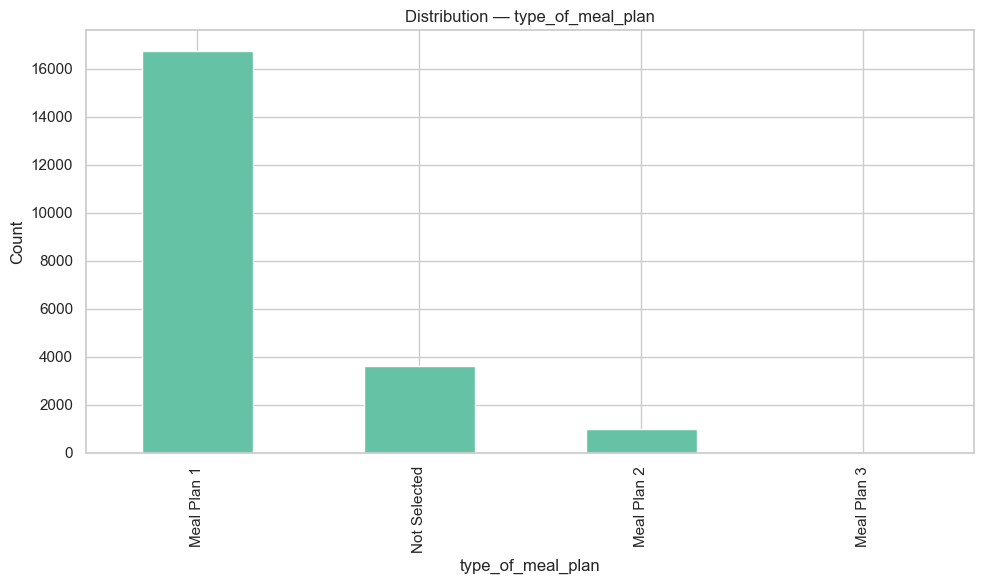

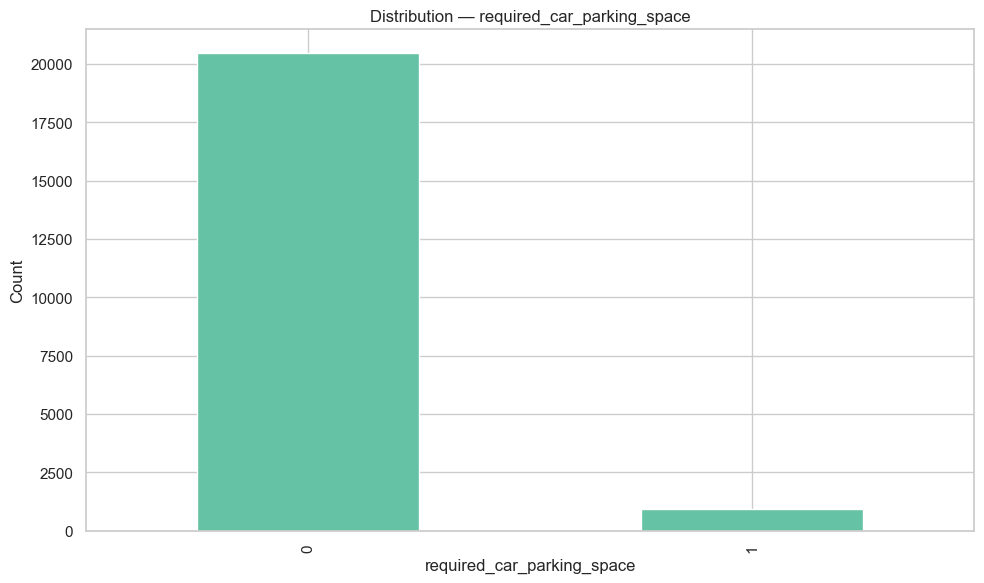

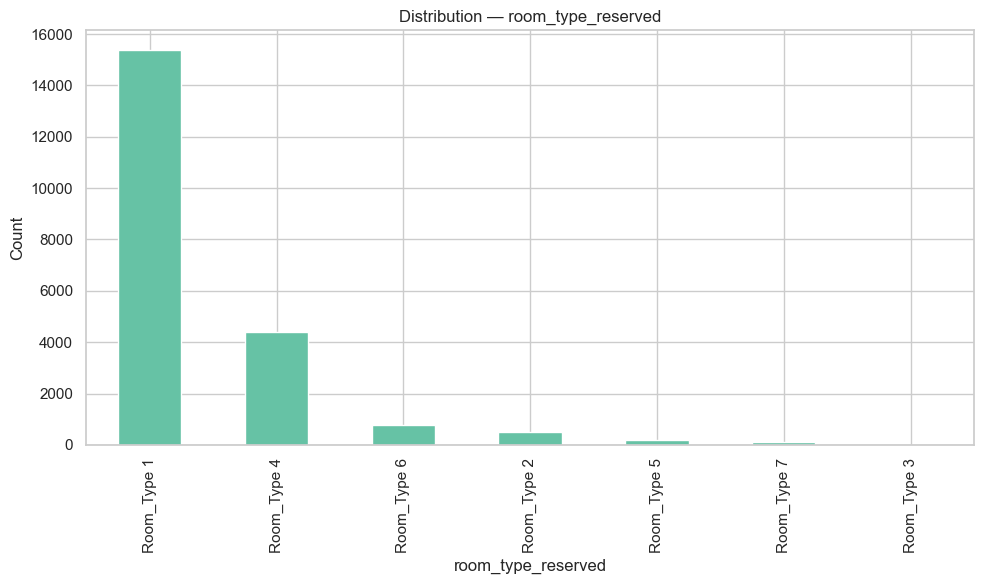

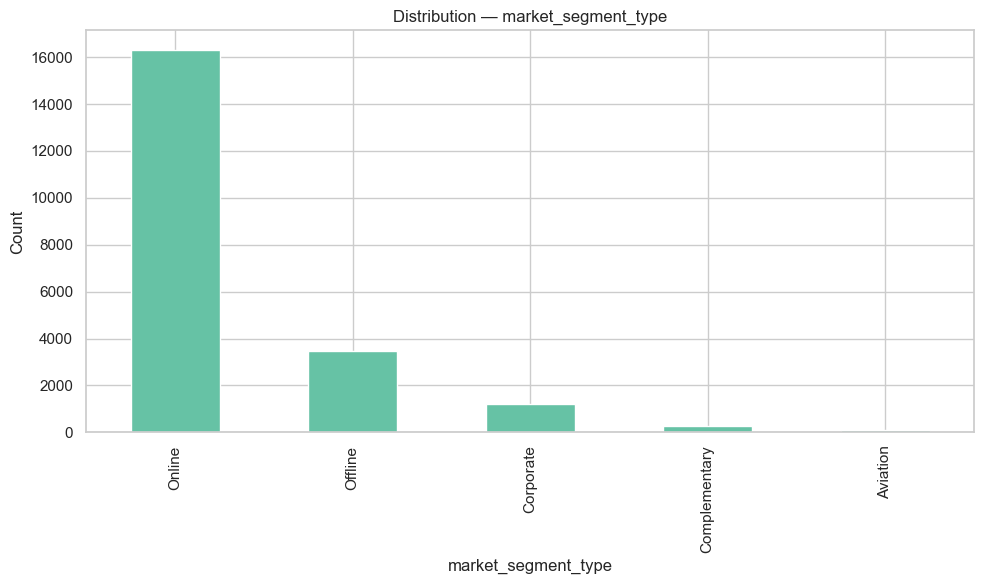

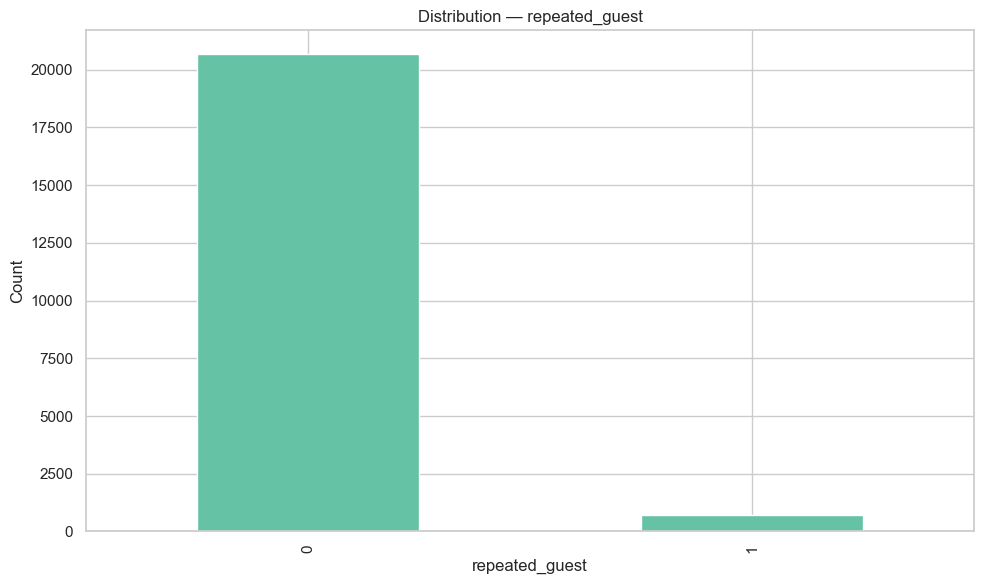

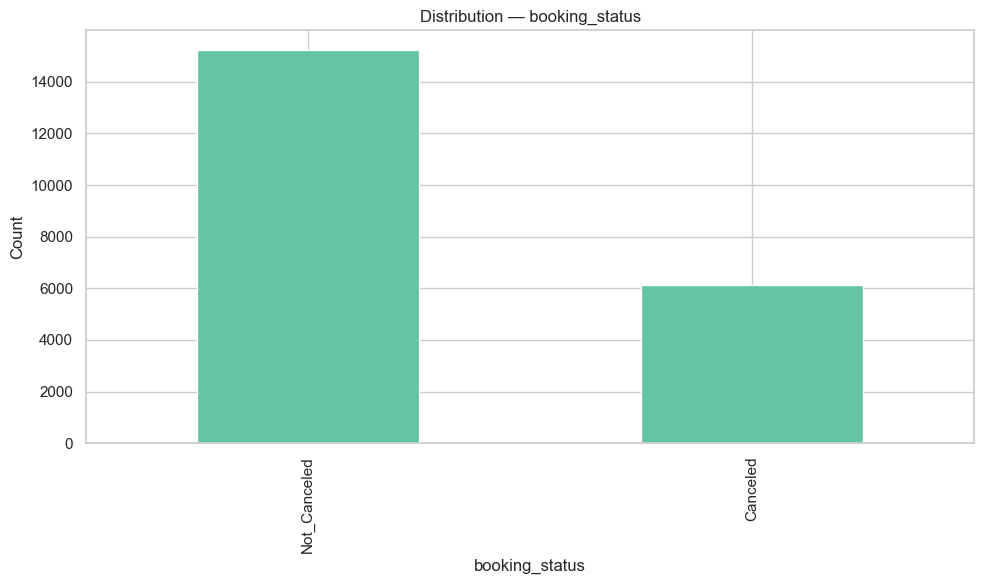

✅ Categorical distribution plots rendered.


In [13]:
# -------------------------------------------------------------------
# Categorical Distributions (Univariate)
# -------------------------------------------------------------------
for cat_feature in cat_cols:
    plt.figure(figsize=(10, 6))
    data[cat_feature].value_counts(dropna=False).plot(kind='bar')
    plt.title(f"Distribution — {cat_feature}")
    plt.xlabel(cat_feature)
    plt.ylabel("Count")
    plt.tight_layout()
    plt.show()

print("✅ Categorical distribution plots rendered.")

### 🧪 **14. Bivariate: Numeric vs Target <a id="14-bivariate-numeric-vs-target"></a>**

📊 Rendering numeric vs target boxplots…


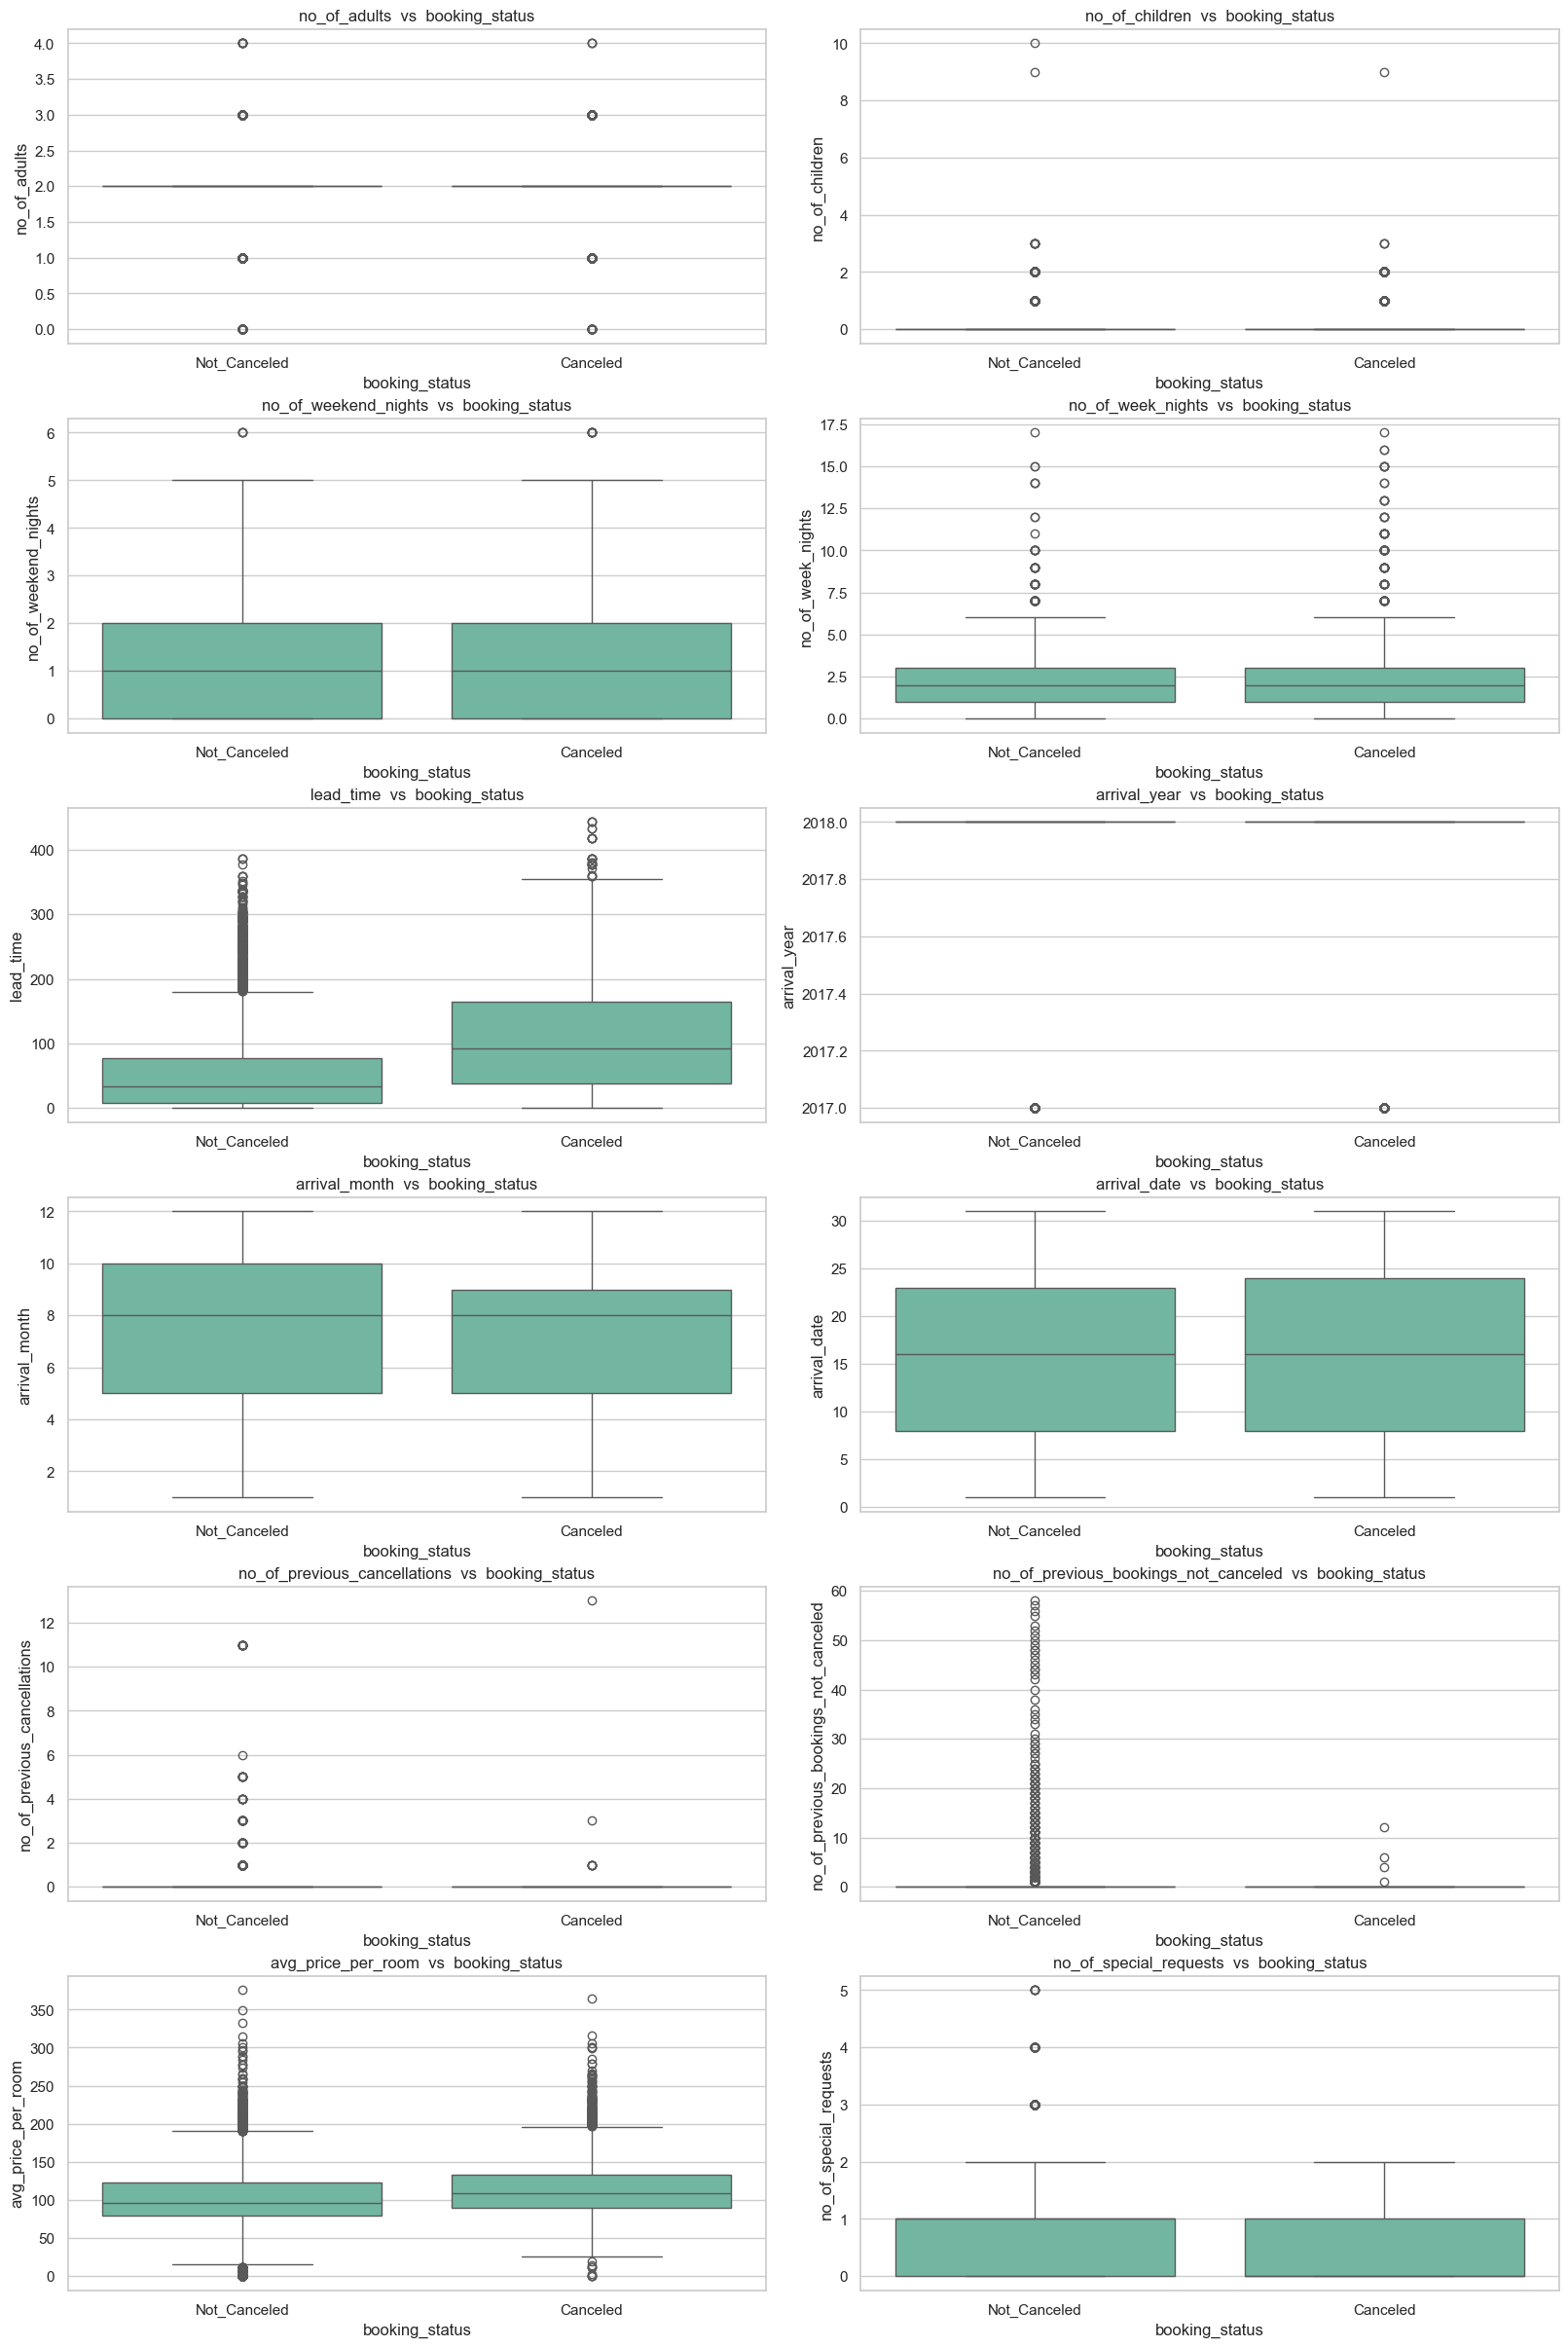

In [14]:
# -------------------------------------------------------------------
# Bivariate: Numeric Features vs Target (Boxplots)
# -------------------------------------------------------------------
def plot_bivariate_num(df, target, num_features):
    """
    Boxplots of numeric features grouped by target.
    """
    if target not in df.columns:
        raise KeyError(f"Target '{target}' not found in dataframe.")

    n = len(num_features)
    if n == 0:
        print("ℹ️ No numeric features provided.")
        return

    rows = math.ceil(n / 2)
    fig, axes = plt.subplots(rows, 2, figsize=(16, rows * 4), constrained_layout=True)
    axes = axes.flatten()

    for i, column in enumerate(num_features):
        sns.boxplot(x=target, y=column, data=df, ax=axes[i], color=None)
        axes[i].set_title(f"{column}  vs  {target}")
        axes[i].set_xlabel(target)
        axes[i].set_ylabel(column)

    # Hide any unused subplots
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    plt.show()

print("📊 Rendering numeric vs target boxplots…")
plot_bivariate_num(data, 'booking_status', num_cols)

### 📅 **15. Average Price by Arrival Month <a id="15-average-price-by-arrival-month"></a>**

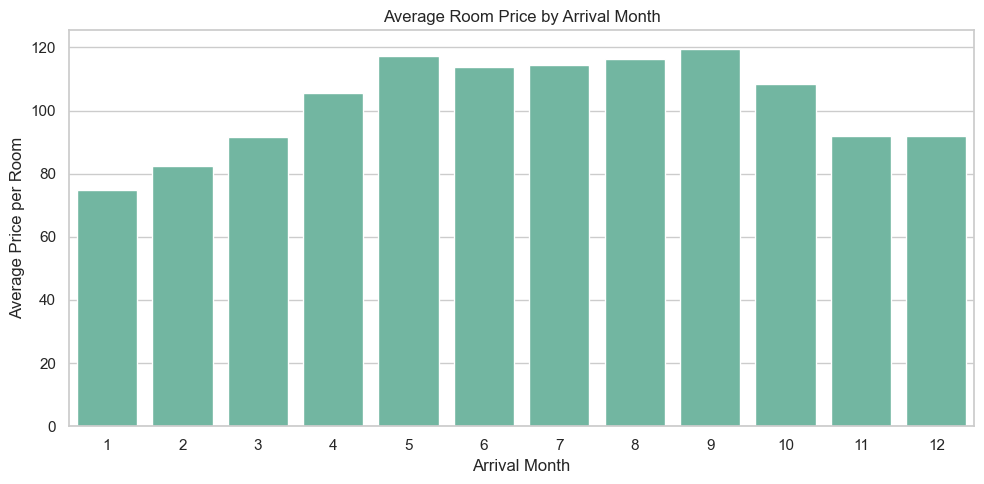

In [15]:
# -------------------------------------------------------------------
# Average Price per Room by Arrival Month
# -------------------------------------------------------------------
plt.figure(figsize=(10, 5))
sns.barplot(x='arrival_month', y='avg_price_per_room', data=data, estimator=np.mean, ci=None)
plt.title("Average Room Price by Arrival Month")
plt.xlabel("Arrival Month")
plt.ylabel("Average Price per Room")
plt.tight_layout()
plt.show()

### 🧩 **16. Bivariate: Categorical vs Target <a id="16-bivariate-categorical-vs-target"></a>**

📊 Rendering categorical vs target countplots…


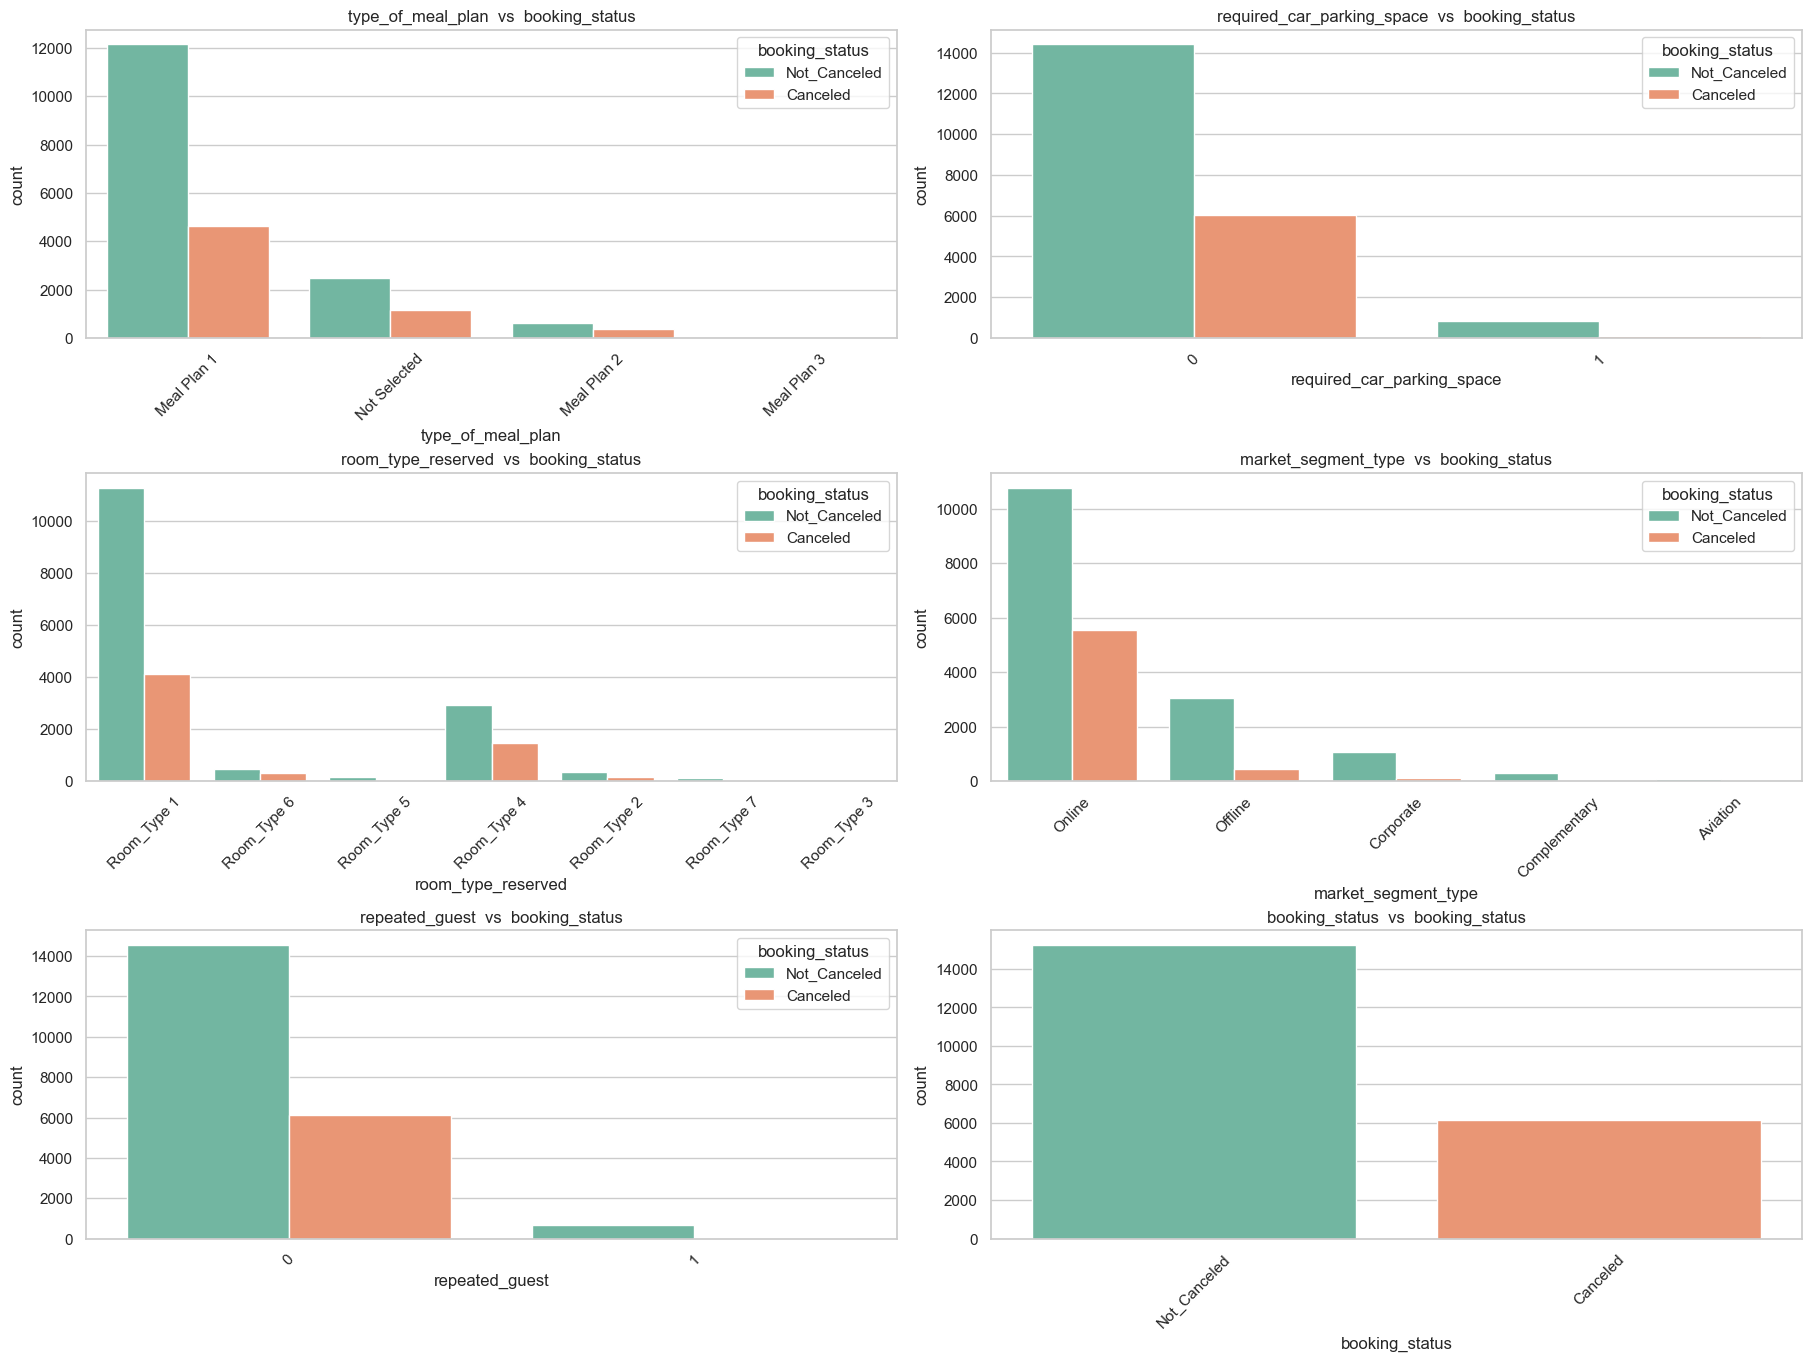

In [16]:
# -------------------------------------------------------------------
# Bivariate: Categorical Features vs Target (Countplots with Hue)
# -------------------------------------------------------------------
def plot_bivariate_cat(df, target, cat_features):
    """
    Countplots of categorical features with target as hue.
    """
    if target not in df.columns:
        raise KeyError(f"Target '{target}' not found in dataframe.")

    n = len(cat_features)
    if n == 0:
        print("ℹ️ No categorical features provided.")
        return

    rows = math.ceil(n / 2)
    fig, axes = plt.subplots(rows, 2, figsize=(18, rows * 4.5), constrained_layout=True)
    axes = axes.flatten()

    for i, feature in enumerate(cat_features):
        sns.countplot(x=feature, hue=target, data=df, ax=axes[i])
        axes[i].set_title(f"{feature}  vs  {target}")
        axes[i].tick_params(axis='x', rotation=45)

    # Hide any unused subplots
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    plt.show()

print("📊 Rendering categorical vs target countplots…")
plot_bivariate_cat(data, 'booking_status', cat_cols)

## 🧰 **Preprocessing & Feature Checks**

### 👀 **17. Peek & Info Before Processing <a id="17-peek--info-before-processing"></a>**

In [17]:
# -------------------------------------------------------------------
# Peek & Info (pre-encoding)
# -------------------------------------------------------------------
display(df.head())
print("\nℹ️ DataFrame info (before encoding):")
df.info()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,1,2,1,Meal Plan 1,0,Room_Type 1,26,2017,10,17,Online,0,0,0,161.00,0,Not_Canceled
1,2,1,1,1,Meal Plan 1,0,Room_Type 1,98,2018,7,16,Online,0,0,0,121.50,2,Not_Canceled
2,2,0,0,3,Meal Plan 1,0,Room_Type 1,433,2018,9,8,Offline,0,0,0,70.00,0,Canceled
3,2,0,2,5,Meal Plan 1,0,Room_Type 1,195,2018,8,8,Offline,0,0,0,72.25,0,Not_Canceled
4,1,0,0,2,Meal Plan 1,0,Room_Type 1,188,2018,6,15,Offline,0,0,0,130.00,0,Canceled



ℹ️ DataFrame info (before encoding):
<class 'pandas.core.frame.DataFrame'>
Index: 21359 entries, 0 to 29019
Data columns (total 18 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   no_of_adults                          21359 non-null  int64  
 1   no_of_children                        21359 non-null  int64  
 2   no_of_weekend_nights                  21359 non-null  int64  
 3   no_of_week_nights                     21359 non-null  int64  
 4   type_of_meal_plan                     21359 non-null  object 
 5   required_car_parking_space            21359 non-null  int64  
 6   room_type_reserved                    21359 non-null  object 
 7   lead_time                             21359 non-null  int64  
 8   arrival_year                          21359 non-null  int64  
 9   arrival_month                         21359 non-null  int64  
 10  arrival_date                          21359 non-n

### 🔤 **18. Label Encoding & Mappings <a id="18-label-encoding--mappings"></a>**

In [18]:
# -------------------------------------------------------------------
# Label Encoding (Categoricals) + Mapping Dictionary
# -------------------------------------------------------------------
label_encoder = LabelEncoder()
mappings = {}

for col in cat_cols:
    # Fit-transform column and store mapping for that column
    df[col] = label_encoder.fit_transform(df[col].astype(str))
    mappings[col] = {
        label: code
        for label, code in zip(
            label_encoder.classes_,
            label_encoder.transform(label_encoder.classes_)
        )
    }

print("✅ Label encoding complete. Mappings per column:")
display(pd.DataFrame({k: pd.Series(v) for k, v in mappings.items()}))

✅ Label encoding complete. Mappings per column:


,type_of_meal_plan,required_car_parking_space,room_type_reserved,market_segment_type,repeated_guest,booking_status
0,NaN,0.0,NaN,NaN,0.0,NaN
1,NaN,1.0,NaN,NaN,1.0,NaN
Aviation,NaN,NaN,NaN,0.0,NaN,NaN
Canceled,NaN,NaN,NaN,NaN,NaN,0.0
Complementary,NaN,NaN,NaN,1.0,NaN,NaN
Corporate,NaN,NaN,NaN,2.0,NaN,NaN
Meal Plan 1,0.0,NaN,NaN,NaN,NaN,NaN
Meal Plan 2,1.0,NaN,NaN,NaN,NaN,NaN
Meal Plan 3,2.0,NaN,NaN,NaN,NaN,NaN
Not Selected,3.0,NaN,NaN,NaN,NaN,NaN


### 📇 **19. Info After Encoding <a id="19-info-after-encoding"></a>**

In [19]:
# -------------------------------------------------------------------
# Info (post-encoding)
# -------------------------------------------------------------------
display(df.head())
print("\nℹ️ DataFrame info (after encoding):")
df.info()


,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,1,2,1,0,0,0,26,2017,10,17,4,0,0,0,161.00,0,1
1,2,1,1,1,0,0,0,98,2018,7,16,4,0,0,0,121.50,2,1
2,2,0,0,3,0,0,0,433,2018,9,8,3,0,0,0,70.00,0,0
3,2,0,2,5,0,0,0,195,2018,8,8,3,0,0,0,72.25,0,1
4,1,0,0,2,0,0,0,188,2018,6,15,3,0,0,0,130.00,0,0



ℹ️ DataFrame info (after encoding):
<class 'pandas.core.frame.DataFrame'>
Index: 21359 entries, 0 to 29019
Data columns (total 18 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   no_of_adults                          21359 non-null  int64  
 1   no_of_children                        21359 non-null  int64  
 2   no_of_weekend_nights                  21359 non-null  int64  
 3   no_of_week_nights                     21359 non-null  int64  
 4   type_of_meal_plan                     21359 non-null  int64  
 5   required_car_parking_space            21359 non-null  int64  
 6   room_type_reserved                    21359 non-null  int64  
 7   lead_time                             21359 non-null  int64  
 8   arrival_year                          21359 non-null  int64  
 9   arrival_month                         21359 non-null  int64  
 10  arrival_date                          21359 non-nu

### 🧮 **20. VIF (Collinearity Check) <a id="20-vif-collinearity-check"></a>**

In [20]:
# -------------------------------------------------------------------
# Variance Inflation Factor (VIF) — Collinearity Check
# -------------------------------------------------------------------
X = add_constant(df)  # includes intercept
vif_data = pd.DataFrame({
    "feature": X.columns,
    "VIF": [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
})

print("📈 VIF results (higher means more collinearity):")
display(vif_data.sort_values("VIF", ascending=False).reset_index(drop=True))

📈 VIF results (higher means more collinearity):


,feature,VIF
0,const,4.100197e+07
1,avg_price_per_room,1.926372e+00
2,repeated_guest,1.765576e+00
3,no_of_previous_bookings_not_canceled,1.712854e+00
4,market_segment_type,1.704297e+00
5,room_type_reserved,1.549859e+00
6,lead_time,1.406287e+00
7,no_of_previous_cancellations,1.396559e+00
8,booking_status,1.389308e+00
9,no_of_adults,1.341180e+00


## 🔥 **Feature Correlation & Transformation**

### 🧮 **21. Correlation Matrix (values) <a id="21-correlation-matrix-values"></a>**

In [21]:
# -------------------------------------------------------------------
# Correlation Matrix (Numerical Columns)
# -------------------------------------------------------------------
corr = df.corr(numeric_only=True)
print("📈 Correlation matrix (numeric columns only):")
display(corr)

📈 Correlation matrix (numeric columns only):


,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
no_of_adults,1.000000,-0.049738,0.092764,0.114218,-0.005977,0.000419,0.275089,0.150995,0.096366,0.004833,0.018382,0.310783,-0.238974,-0.063739,-0.143903,0.327749,0.156833,-0.097198
no_of_children,-0.049738,1.000000,0.011033,0.019408,-0.102631,0.018089,0.351786,0.010094,0.036248,0.002606,0.027934,0.103359,-0.048678,-0.020954,-0.029112,0.352640,0.099069,-0.060030
no_of_weekend_nights,0.092764,0.011033,1.000000,0.223154,-0.041123,-0.057417,0.029964,0.131240,0.029016,0.011300,0.006921,0.091510,-0.088633,-0.028935,-0.040008,-0.003579,0.013803,-0.067944
no_of_week_nights,0.114218,0.019408,0.223154,1.000000,-0.073247,-0.061798,0.085547,0.223953,0.022199,0.030029,-0.000633,0.116978,-0.115186,-0.033133,-0.051829,0.018420,0.032304,-0.124415
type_of_meal_plan,-0.005977,-0.102631,-0.041123,-0.073247,1.000000,-0.024666,-0.245616,-0.055124,0.094627,0.008576,-0.006094,0.184654,-0.075476,-0.017205,-0.044891,-0.100708,-0.011933,-0.035864
required_car_parking_space,0.000419,0.018089,-0.057417,-0.061798,-0.024666,1.000000,0.016335,-0.046767,0.010158,-0.015330,-0.009352,-0.039210,0.113582,0.026876,0.066665,0.055536,0.075479,0.092511
room_type_reserved,0.275089,0.351786,0.029964,0.085547,-0.245616,0.016335,1.000000,-0.014666,0.090492,0.001906,0.024315,0.089176,-0.045353,-0.013842,-0.024727,0.490983,0.086319,-0.072128
lead_time,0.150995,0.010094,0.131240,0.223953,-0.055124,-0.046767,-0.014666,1.000000,0.169463,0.132140,0.034112,0.140396,-0.148948,-0.053930,-0.087026,-0.044061,-0.012787,-0.368151
arrival_year,0.096366,0.036248,0.029016,0.022199,0.094627,0.010158,0.090492,0.169463,1.000000,-0.322786,0.011340,0.111445,-0.010158,0.011111,0.025551,0.174569,0.000594,-0.149673
arrival_month,0.004833,0.002606,0.011300,0.030029,0.008576,-0.015330,0.001906,0.132140,-0.322786,1.000000,-0.020386,-0.017885,0.001744,-0.043586,-0.003881,0.066156,0.136037,0.015898


### 🔥 **22. Correlation Heatmap <a id="22-correlation-heatmap"></a>**

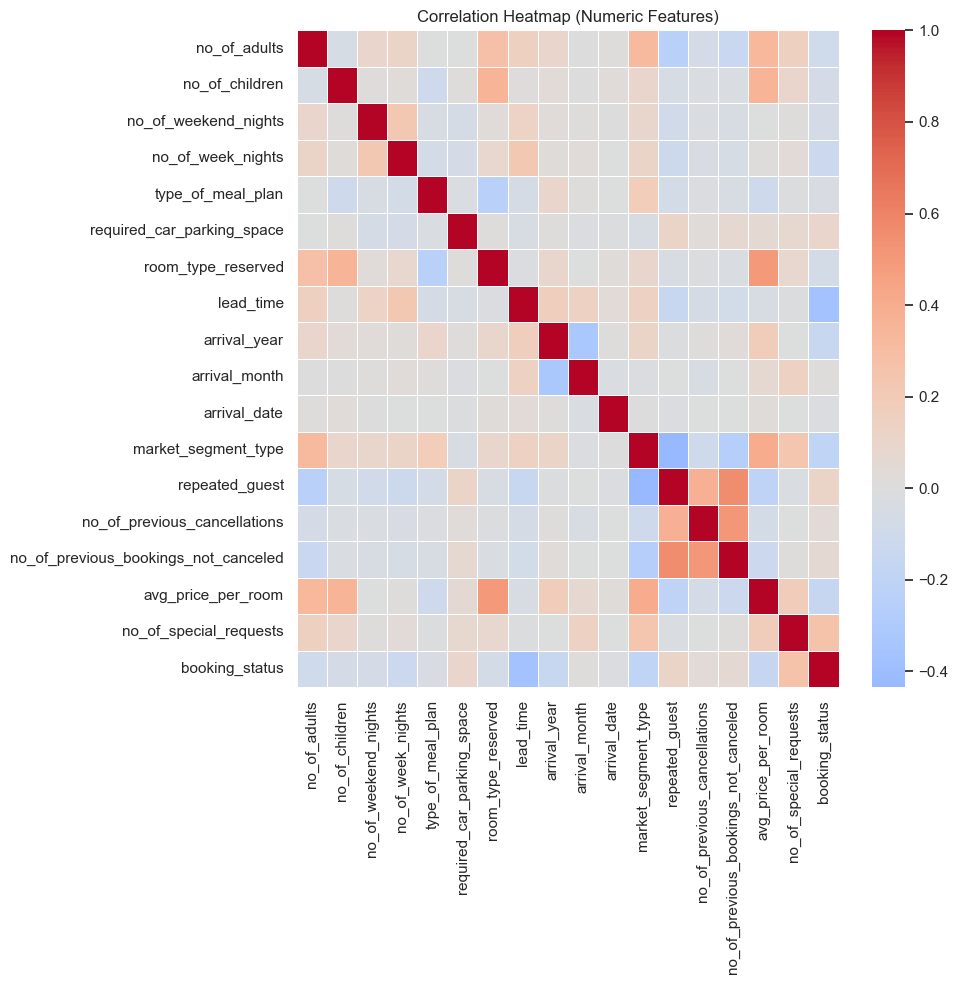

In [22]:
# -------------------------------------------------------------------
# Heatmap — Correlation (Numerical)
# -------------------------------------------------------------------
plt.figure(figsize=(10, 10))
sns.heatmap(corr, linewidths=0.5, cmap="coolwarm", center=0)
plt.title("Correlation Heatmap (Numeric Features)")
plt.tight_layout()
plt.show()

### 📏 **23. Skewness & Log1p Transform <a id="23-skewness--log1p-transform"></a>**

In [23]:
# -------------------------------------------------------------------
# Skewness Check & Log1p Transform for Heavily Skewed Features
#   - Applies to numeric features only
#   - Skewness threshold: > 5 (your original rule)
#   - Guard: only transform if values are >= 0 (log1p-safe)
# -------------------------------------------------------------------
skewness = df.select_dtypes(include=[np.number]).skew(numeric_only=True)
print("📐 Skewness (numeric columns):")
display(skewness.sort_values(ascending=False))

# Do not transform the target
features_for_skew = [c for c in df.select_dtypes(include=[np.number]).columns if c != "booking_status"]

transformed_cols = []
for col in features_for_skew:
    if skewness.get(col, 0) > 5:
        if (df[col].min() >= 0):
            df[col] = np.log1p(df[col])
            transformed_cols.append(col)

if transformed_cols:
    print(f"✅ Applied log1p to heavily skewed columns (>5): {transformed_cols}")
else:
    print("ℹ️ No columns exceeded skewness > 5 with non-negative values.")

📐 Skewness (numeric columns):


no_of_previous_cancellations            22.001489
no_of_previous_bookings_not_canceled    16.735934
repeated_guest                           5.282330
required_car_parking_space               4.538315
no_of_children                           4.165696
type_of_meal_plan                        1.650716
no_of_week_nights                        1.553657
lead_time                                1.405258
room_type_reserved                       1.392145
no_of_special_requests                   0.922373
no_of_weekend_nights                     0.636637
avg_price_per_room                       0.542888
arrival_date                             0.010333
arrival_month                           -0.293266
no_of_adults                            -0.305652
booking_status                          -0.942305
arrival_year                            -1.953273
market_segment_type                     -2.333046
dtype: float64

✅ Applied log1p to heavily skewed columns (>5): ['repeated_guest', 'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled']


## ⚖️ **Class Balancing & Train/Test Prep**

### 🎯 **24. Target Balance (Post-Transform) <a id="24-target-balance-post-transform"></a>**

In [24]:
# -------------------------------------------------------------------
# Target Balance Check (after any transforms)
# -------------------------------------------------------------------
print("🎯 booking_status distribution:")
display(df["booking_status"].value_counts().to_frame("count"))

🎯 booking_status distribution:


,count
booking_status,
1,15231
0,6128


### ✂️ **25. Split Features/Target <a id="25-split-featurestarget"></a>**

In [25]:
# -------------------------------------------------------------------
# Split into Features (X) and Target (y)
# -------------------------------------------------------------------
X = df.drop(columns="booking_status")
y = df["booking_status"]

print(f"✅ X shape: {X.shape} | y length: {len(y)}")

✅ X shape: (21359, 17) | y length: 21359


### 🧭 **26. Inspect Feature Columns & Target <a id="26-inspect-feature-columns--target"></a>**

In [26]:
# -------------------------------------------------------------------
# Quick Peek at Columns and Target Balance
# -------------------------------------------------------------------
print("📋 Feature columns:")
print(list(X.columns))

print("\n🎯 Target balance:")
display(y.value_counts().to_frame("count"))

📋 Feature columns:
['no_of_adults', 'no_of_children', 'no_of_weekend_nights', 'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space', 'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month', 'arrival_date', 'market_segment_type', 'repeated_guest', 'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled', 'avg_price_per_room', 'no_of_special_requests']

🎯 Target balance:


,count
booking_status,
1,15231
0,6128


### ⚖️ **27. Handle Class Imbalance with SMOTE <a id="27-handle-class-imbalance-with-smote"></a>**

In [27]:
# -------------------------------------------------------------------
# SMOTE Oversampling
# -------------------------------------------------------------------
smote = SMOTE(random_state=5910)
X_res, y_res = smote.fit_resample(X, y)

print("✅ SMOTE applied.")
print(f"🔁 Resampled shapes — X_res: {X_res.shape}, y_res: {y_res.shape}")
print("\n🎯 Target balance after SMOTE:")
display(y_res.value_counts().to_frame("count"))

✅ SMOTE applied.
🔁 Resampled shapes — X_res: (30462, 17), y_res: (30462,)

🎯 Target balance after SMOTE:


,count
booking_status,
1,15231
0,15231


### 🧱 **28. Build Balanced DataFrame <a id="28-build-balanced-dataframe"></a>**

In [28]:
# -------------------------------------------------------------------
# Build a Balanced DataFrame for Downstream Steps
# -------------------------------------------------------------------
balanced_df = pd.DataFrame(X_res, columns=X.columns)
balanced_df["booking_status"] = y_res

print("🧩 balanced_df preview:")
display(balanced_df.head())

print(f"📐 balanced_df shape: {balanced_df.shape}")

🧩 balanced_df preview:


,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,1,2,1,0,0,0,26,2017,10,17,4,0.0,0.0,0.0,161.00,0,1
1,2,1,1,1,0,0,0,98,2018,7,16,4,0.0,0.0,0.0,121.50,2,1
2,2,0,0,3,0,0,0,433,2018,9,8,3,0.0,0.0,0.0,70.00,0,0
3,2,0,2,5,0,0,0,195,2018,8,8,3,0.0,0.0,0.0,72.25,0,1
4,1,0,0,2,0,0,0,188,2018,6,15,3,0.0,0.0,0.0,130.00,0,0


📐 balanced_df shape: (30462, 18)


### 🔄 **29. Replace df with Balanced Copy <a id="29-replace-df-with-balanced-copy"></a>**

In [29]:
# -------------------------------------------------------------------
# Replace Working DataFrame with Balanced Version
# -------------------------------------------------------------------
df = balanced_df.copy()
print(f"✅ 'df' replaced with balanced data. New shape: {df.shape}")

✅ 'df' replaced with balanced data. New shape: (30462, 18)


## 🧠 **Baseline Modelling & Feature Importance**

### 🔢 **30. Column Count <a id="30-column-count"></a>**

In [30]:
# -------------------------------------------------------------------
# Column Count
# -------------------------------------------------------------------
print(f"🧮 Number of columns in df: {len(df.columns)}")

🧮 Number of columns in df: 18


### 🌳 **31. Feature Importance via RandomForest <a id="31-feature-importance-via-randomforest"></a>**

In [31]:
# -------------------------------------------------------------------
# Baseline Feature Importance (RandomForest)
# -------------------------------------------------------------------
X = df.drop(columns='booking_status')
y = df["booking_status"]

rf = RandomForestClassifier(random_state=5910, n_estimators=300, n_jobs=-1)
rf.fit(X, y)

feature_importance = rf.feature_importances_
feature_importance_df = (
    pd.DataFrame({"feature": X.columns, "importance": feature_importance})
    .sort_values(by="importance", ascending=False)
    .reset_index(drop=True)
)

print("🌟 Top features by RandomForest importance:")
display(feature_importance_df.head(15))

🌟 Top features by RandomForest importance:


,feature,importance
0,lead_time,0.265040
1,no_of_special_requests,0.182960
2,avg_price_per_room,0.149934
3,arrival_month,0.084796
4,arrival_date,0.083197
5,market_segment_type,0.054798
6,no_of_week_nights,0.045690
7,no_of_weekend_nights,0.030837
8,type_of_meal_plan,0.020684
9,room_type_reserved,0.019776


### 🔟 **32. Top-10 Feature Subset <a id="32-top10-feature-subset"></a>**

In [32]:
# -------------------------------------------------------------------
# Select Top-10 Features + Target for a compact view
# -------------------------------------------------------------------
top_10_features = feature_importance_df["feature"].head(10).tolist()
top_10_df = df[top_10_features + ["booking_status"]]

print(f"✅ Built top_10_df with {len(top_10_df.columns)} columns (10 features + target).")
display(top_10_df.head())

✅ Built top_10_df with 11 columns (10 features + target).


,lead_time,no_of_special_requests,avg_price_per_room,arrival_month,arrival_date,market_segment_type,no_of_week_nights,no_of_weekend_nights,type_of_meal_plan,room_type_reserved,booking_status
0,26,0,161.00,10,17,4,1,2,0,0,1
1,98,2,121.50,7,16,4,1,1,0,0,1
2,433,0,70.00,9,8,3,3,0,0,0,0
3,195,0,72.25,8,8,3,5,2,0,0,1
4,188,0,130.00,6,15,3,2,0,0,0,0


### ✂️ **33. Train/Test Split <a id="33-traintest-split"></a>**

In [33]:
# -------------------------------------------------------------------
# Train/Test Split
# -------------------------------------------------------------------
X = df.drop(columns='booking_status')
y = df["booking_status"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=5910, stratify=y
)

print(f"📦 Train: {X_train.shape}, Test: {X_test.shape}")

📦 Train: (24369, 17), Test: (6093, 17)


### 🤖 **34. Model Zoo: Train & Evaluate <a id="34-model-zoo-train--evaluate"></a>**

In [34]:
# -------------------------------------------------------------------
# Model Zoo — Train & Evaluate a few classic classifiers
# -------------------------------------------------------------------
try:
    from xgboost import XGBClassifier  # type: ignore
    has_xgb = True
except Exception:
    has_xgb = False

try:
    from lightgbm import LGBMClassifier  # type: ignore
    has_lgbm = True
except Exception:
    has_lgbm = False

classifiers = {
    "Random Forest": RandomForestClassifier(random_state=5910, n_estimators=400, n_jobs=-1),
    "Logistic Regression": LogisticRegression(random_state=5910, max_iter=2000, n_jobs=-1),
    "Gradient Boosting": GradientBoostingClassifier(random_state=5910),
    "Support Vector Classifier": SVC(random_state=5910, probability=True),
    "Decision Tree": DecisionTreeClassifier(random_state=5910),
    "KNN": KNeighborsClassifier(),
    "Naive Bayes": GaussianNB(),
    "AdaBoost": AdaBoostClassifier(random_state=5910),
}

if has_xgb:
    classifiers["XGBoost"] = XGBClassifier(
        random_state=5910, n_estimators=400, learning_rate=0.05, max_depth=5, subsample=0.9, colsample_bytree=0.9,
        eval_metric="logloss", n_jobs=-1
    )

if has_lgbm:
    classifiers["LightGBM"] = LGBMClassifier(
        random_state=5910, n_estimators=600, learning_rate=0.05, subsample=0.9, colsample_bytree=0.9, n_jobs=-1
    )

metrics = {
    "Model": [],
    "Accuracy": [],
    "Precision": [],
    "Recall": [],
    "F1 Score": [],
}

for model_name, clf in classifiers.items():
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)

    # Binary metrics (robust to edge cases)
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, zero_division=0)
    rec = recall_score(y_test, y_pred, zero_division=0)
    f1 = f1_score(y_test, y_pred, zero_division=0)

    metrics["Model"].append(model_name)
    metrics["Accuracy"].append(acc)
    metrics["Precision"].append(prec)
    metrics["Recall"].append(rec)
    metrics["F1 Score"].append(f1)

print("✅ Model training & evaluation complete.")

[LightGBM] [Info] Number of positive: 12185, number of negative: 12184
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001895 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 667
[LightGBM] [Info] Number of data points in the train set: 24369, number of used features: 17
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500021 -> initscore=0.000082
[LightGBM] [Info] Start training from score 0.000082
✅ Model training & evaluation complete.


### 🏁 **35. Metrics Leaderboard <a id="35-metrics-leaderboard"></a>**

In [35]:
# -------------------------------------------------------------------
# Consolidated Metrics Leaderboard
# -------------------------------------------------------------------
metrics_df = (
    pd.DataFrame(metrics)
    .sort_values(by=["F1 Score", "Accuracy"], ascending=False)
    .reset_index(drop=True)
)

# Pretty formatting
styled = (
    metrics_df.style
    .format({"Accuracy": "{:.3f}", "Precision": "{:.3f}", "Recall": "{:.3f}", "F1 Score": "{:.3f}"})
    .bar(subset=["Accuracy", "Precision", "Recall", "F1 Score"], vmin=0, vmax=1)
)

print("📊 Leaderboard (sorted by F1, then Accuracy):")
display(styled)

📊 Leaderboard (sorted by F1, then Accuracy):


,Model,Accuracy,Precision,Recall,F1 Score
0,Random Forest,0.888,0.891,0.885,0.888
1,LightGBM,0.881,0.884,0.877,0.880
2,Gradient Boosting,0.836,0.827,0.849,0.838
3,Decision Tree,0.838,0.849,0.823,0.836
4,AdaBoost,0.803,0.806,0.798,0.802
5,Logistic Regression,0.799,0.808,0.785,0.796
6,KNN,0.771,0.840,0.669,0.745
7,Support Vector Classifier,0.660,0.631,0.770,0.694
8,Naive Bayes,0.585,0.924,0.184,0.307


## 🎛️ **Tuning & Evaluation**

### 🎛️ **36. RandomForest Hyperparameter Tuning (RandomizedSearchCV) <a id="36-randomforest-hyperparameter-tuning-randomizedsearchcv"></a>**

In [36]:
# -------------------------------------------------------------------
# Randomized Search — Hyperparameter Tuning for RandomForest
# -------------------------------------------------------------------
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint
from sklearn.ensemble import RandomForestClassifier

# Split again to ensure fresh train/test context
X = df.drop(columns='booking_status')
y = df["booking_status"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=5910, stratify=y
)

# Base estimator
rf = RandomForestClassifier(random_state=5910, n_jobs=-1)

# Parameter distribution for random search
param_dist = {
    'n_estimators': randint(100, 500),
    'max_depth': randint(10, 50),
    'min_samples_split': randint(2, 10),
    'min_samples_leaf': randint(1, 5),
    'bootstrap': [True, False]
}

# Randomized search setup
random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist,
    n_iter=5,            # increase for deeper search (e.g. 30+ for production)
    cv=5,
    verbose=2,
    random_state=5910,
    scoring='accuracy',
    n_jobs=-1
)

print("🔍 Running randomized hyperparameter search for RandomForest...")
random_search.fit(X_train, y_train)
print("✅ RandomizedSearchCV complete.")

🔍 Running randomized hyperparameter search for RandomForest...
Fitting 5 folds for each of 5 candidates, totalling 25 fits
✅ RandomizedSearchCV complete.


### 🏆 **37. Best Model & Evaluation Metrics <a id="37-best-model--evaluation-metrics"></a>**

In [37]:
# -------------------------------------------------------------------
# Retrieve Best Parameters and Evaluate Best Model
# -------------------------------------------------------------------
best_rf_model = random_search.best_estimator_
best_params = random_search.best_params_

print("🌟 Best Hyperparameters Found:")
for k, v in best_params.items():
    print(f" - {k}: {v}")

# Evaluate performance
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

y_pred = best_rf_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("\n📊 Evaluation Metrics for Best RandomForest Model:")
print(f"   Accuracy : {accuracy:.3f}")
print(f"   Precision: {precision:.3f}")
print(f"   Recall   : {recall:.3f}")
print(f"   F1 Score : {f1:.3f}")

🌟 Best Hyperparameters Found:
 - bootstrap: False
 - max_depth: 48
 - min_samples_leaf: 2
 - min_samples_split: 4
 - n_estimators: 306

📊 Evaluation Metrics for Best RandomForest Model:
   Accuracy : 0.887
   Precision: 0.889
   Recall   : 0.886
   F1 Score : 0.887


### 🧾 **38. Summary: Model Performance <a id="38-summary-model-performance"></a>**

In [38]:
# -------------------------------------------------------------------
# Summary Table of Best Model Performance
# -------------------------------------------------------------------
summary_df = pd.DataFrame({
    "Metric": ["Accuracy", "Precision", "Recall", "F1 Score"],
    "Value": [accuracy, precision, recall, f1]
})

print("🏁 Final RandomForest Performance Summary:")
display(summary_df.style.format({"Value": "{:.3f}"}).bar(subset="Value", vmin=0, vmax=1))

🏁 Final RandomForest Performance Summary:


,Metric,Value
0,Accuracy,0.887
1,Precision,0.889
2,Recall,0.886
3,F1 Score,0.887


## 💾 **Persistence & Inference**

### 💾 **39. Save Best Model (Joblib) <a id="39-save-best-model-joblib"></a>**

In [39]:
# -------------------------------------------------------------------
# Persist the Best RandomForest Model
# -------------------------------------------------------------------
MODEL_PATH = "random_forest.pkl"

# Save trained model
joblib.dump(best_rf_model, MODEL_PATH)
print(f"✅ Model successfully saved to: {os.path.abspath(MODEL_PATH)}")

✅ Model successfully saved to: c:\Users\HP\OneDrive\Documents\Projects\MLOps\MLOps-Hotel-Reservation-Prediction\notebook\random_forest.pkl


### 🔁 **40. Load Model Back into Memory <a id="40-load-model-back-into-memory"></a>**

In [40]:
# -------------------------------------------------------------------
# Reload Model for Inference
# -------------------------------------------------------------------
loaded_model = joblib.load(MODEL_PATH)
print("🔄 Model successfully loaded from disk.")

🔄 Model successfully loaded from disk.



### 🧠 **41. Generate Test Prediction <a id="41-generate-test-prediction"></a>**

In [41]:
# -------------------------------------------------------------------
# Generate Prediction on New / Sample Data
# -------------------------------------------------------------------
# Example 1: using first row of test set
sample = X_test.iloc[[0]]
print("🧩 Sample input (X_test first row):")
display(sample)

# Predict
pred = loaded_model.predict(sample)[0]
print(f"🎯 Predicted booking_status: {pred}")

# Example 2 (optional): if you have a custom new_data DataFrame, ensure schema alignment
# predictions = loaded_model.predict(new_data)
# print(predictions)

🧩 Sample input (X_test first row):


,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
29502,2,0,0,1,0,0,0,153,2018,8,22,4,0.0,0.0,0.0,114.419411,1


🎯 Predicted booking_status: 0



### 🏁 **42. Final Output Summary <a id="42-final-output-summary"></a>**

In [42]:
# -------------------------------------------------------------------
# Summary of Model Persistence & Inference
# -------------------------------------------------------------------
print("🏁 End-to-End Summary:")
print(f" - Model Path: {MODEL_PATH}")
print(f" - Test Sample Prediction: {pred}")
print(f" - Model Type: {type(loaded_model).__name__}")
print("✅ Pipeline complete — model ready for deployment or integration.")

🏁 End-to-End Summary:
 - Model Path: random_forest.pkl
 - Test Sample Prediction: 0
 - Model Type: RandomForestClassifier
✅ Pipeline complete — model ready for deployment or integration.
